In [47]:
import numpy as np
from operator import itemgetter

layers = [
    { "g": 0.9, "mu_a":0.04, "mu_s": 20 }
]

# diffusion, rho > 1/mu_s'
def one_layer_approx(x):
    g, mu_a, mu_s = itemgetter('g', 'mu_a', 'mu_s')(layers[0])

    red_mu_s = (1-g)*mu_s
    red_mu_t = red_mu_s + mu_a
    mu_eff = np.sqrt(3*mu_a*(mu_a + red_mu_s))
    red_a = red_mu_s / red_mu_t

    z_0 = 1/red_mu_s
    D = 1/(3*(mu_a+red_mu_s))
    z_1 = z_0 + 4*D

    r_1 = np.sqrt(z_0**2 + x**2)
    r_2 = np.sqrt(z_1**2 + x**2)

    prefac = red_a / (4*np.pi)

    term1 = z_0*(mu_eff + 1/r_1)*np.exp(-r_1*mu_eff)/r_1**2
    term2 = z_1*(mu_eff + 1/r_2)*np.exp(-r_2*mu_eff)/r_2**2

    result = prefac*(term1 + term2)

    return result


# diffusion, large rho approx
def three_layer_approx():
    pass

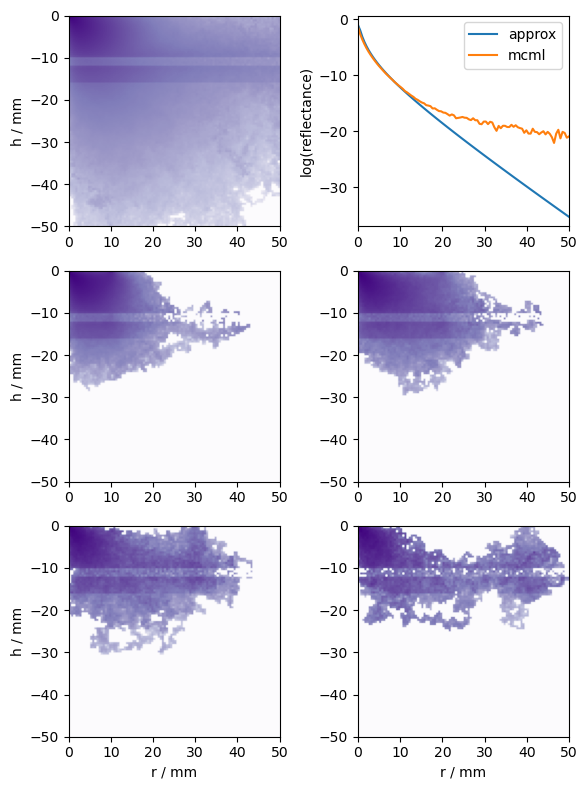

In [48]:
import matplotlib.pyplot as plt

import sys

path = lambda ext: sys.path[0] + '/results/' + ext
data = lambda ext: np.genfromtxt(path(ext), delimiter=',')

absorption = data('absorption_verification.csv')
reflectance = data('reflectance_verification.csv')

dists = range(10, 41, 10)
absorption_for_dist = [data('absorption_verification_' + str(i) + 'mm.csv') for i in dists]

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(6,8), subplot_kw=dict(box_aspect=1))

# Total absorption
ax = axs[0][0]
im = ax.imshow(np.log(absorption + 1e-9), cmap='Purples', extent=[0, 50, -50, 0])

axs[0][0].set_ylabel('h / mm')

ax.sharex(axs[2][0])


# These values have to be hard set
x = np.linspace(0, 50, 100)

# Reflectance, compared to one layer model
ax = axs[0][1]
ax.plot(x, np.log(one_layer_approx(x)), label="approx")
ax.plot(x, np.log(reflectance), label="mcml")

ax.set_ylabel('log(reflectance)')

ax.sharex(axs[2][1])


ax.legend()

# The four distance absorption figures
for i, dist in enumerate(dists):
    row, col = int(np.floor(i / 2) + 1), i % 2
    ax = axs[int(np.floor(i / 2) + 1)][i % 2]
    im = ax.imshow(np.log(absorption_for_dist[i] + 1e-9), cmap='Purples', extent=[0, 50, -50, 0])

    if col == 0:
        ax.set_ylabel('h / mm')
    else:
        ax.sharey(axs[row][1])
    ax.sharex(axs[0][i % 2])

for i in [0,1]:
    axs[2][i].set_xlabel('r / mm')

axs[2][0].set_ylabel('h / mm')


plt.tight_layout()

fig.savefig('absorption_density_one_layer.pdf', transparent=True)
